## United States Airlines Analysis


In [1]:
# Let's import the necessary library.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# let's remove the unnecessary warnings.
import warnings
warnings.filterwarnings("ignore")

## Project Task: Week 1 (Applied data science with Python)
## 1. Import and aggregate data:
### a. Collect information related to flights, airports (e.g., type of airport and elevation), and runways (e.g., length_ft, width_ft, surface, and number of runways). Gather all fields you believe might cause avoidable delays in one dataset.
#### Hint: In this case, you would have to determine the keys to join the tables. A data description will be useful.

In [3]:
# Now let's import the data for the further operation.
airline = pd.read_excel("Airlines.xlsx")

In [4]:
airline.shape

(518556, 9)

In [5]:
airline.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [6]:
airpot = pd.read_excel("airports.xlsx")

In [7]:
airpot.shape

(73805, 18)

In [8]:
airpot.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR


In [9]:
runway = pd.read_excel("runways.xlsx")

In [10]:
runway.shape

(43977, 20)

In [11]:
runway.head()

,id,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed,le_ident,le_latitude_deg,le_longitude_deg,le_elevation_ft,le_heading_degT,le_displaced_threshold_ft,he_ident,he_latitude_deg,he_longitude_deg,he_elevation_ft,he_heading_degT,he_displaced_threshold_ft
0,269408,6523,00A,80.0,80.0,ASPH-G,1,0,H1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,255155,6524,00AK,2500.0,70.0,GRVL,0,0,N,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN
2,254165,6525,00AL,2300.0,200.0,TURF,0,0,1,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN
3,270932,6526,00AR,40.0,40.0,GRASS,0,0,H1,NaN,NaN,NaN,NaN,NaN,H1,NaN,NaN,NaN,NaN,NaN
4,322128,322127,00AS,1450.0,60.0,Turf,0,0,1,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN


In [12]:
# Before merging the data lets drop the columns that will not play an important role in the model building
runway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43977 entries, 0 to 43976
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         43977 non-null  int64  
 1   airport_ref                43977 non-null  int64  
 2   airport_ident              43977 non-null  object 
 3   length_ft                  43753 non-null  float64
 4   width_ft                   41088 non-null  float64
 5   surface                    43520 non-null  object 
 6   lighted                    43977 non-null  int64  
 7   closed                     43977 non-null  int64  
 8   le_ident                   43793 non-null  object 
 9   le_latitude_deg            15016 non-null  float64
 10  le_longitude_deg           15000 non-null  float64
 11  le_elevation_ft            12781 non-null  float64
 12  le_heading_degT            14624 non-null  float64
 13  le_displaced_threshold_ft  2883 non-null   flo

In [13]:
runways = runway.drop(['le_ident', 'le_latitude_deg','le_longitude_deg', 'le_elevation_ft', 'le_heading_degT',
       'le_displaced_threshold_ft', 'he_ident', 'he_latitude_deg','he_longitude_deg', 'he_elevation_ft', 'he_heading_degT',
       'he_displaced_threshold_ft'], axis = 1)

In [14]:
runways

,id,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed
0,269408,6523,00A,80.0,80.0,ASPH-G,1,0
1,255155,6524,00AK,2500.0,70.0,GRVL,0,0
2,254165,6525,00AL,2300.0,200.0,TURF,0,0
3,270932,6526,00AR,40.0,40.0,GRASS,0,0
4,322128,322127,00AS,1450.0,60.0,Turf,0,0
...,...,...,...,...,...,...,...,...
43972,235186,27243,ZYTX,10499.0,148.0,CON,1,0
43973,235169,27244,ZYYJ,8530.0,148.0,CON,1,0
43974,354997,317861,ZYYK,8202.0,NaN,NaN,0,0
43975,346789,346788,ZZ-0003,1800.0,15.0,Turf,0,0


In [15]:
# Now lets remove the feature from the airpot data that is not usefull.
airpot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73805 entries, 0 to 73804
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 73805 non-null  int64  
 1   ident              73805 non-null  object 
 2   type               73805 non-null  object 
 3   name               73805 non-null  object 
 4   latitude_deg       73805 non-null  float64
 5   longitude_deg      73805 non-null  float64
 6   elevation_ft       59683 non-null  float64
 7   continent          38086 non-null  object 
 8   iso_country        73546 non-null  object 
 9   iso_region         73805 non-null  object 
 10  municipality       68739 non-null  object 
 11  scheduled_service  73805 non-null  object 
 12  gps_code           42996 non-null  object 
 13  iata_code          9160 non-null   object 
 14  local_code         32975 non-null  object 
 15  home_link          3492 non-null   object 
 16  wikipedia_link     107

In [16]:
airpots = airpot.drop(['continent', 'iso_country', 'iso_region','municipality', 'gps_code','local_code', 'home_link',
                       'wikipedia_link', 'keywords'], axis=1)

In [17]:
airpots

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,scheduled_service,iata_code
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,no,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,no,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,no,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,no,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,no,NaN
...,...,...,...,...,...,...,...,...,...
73800,46378,ZZ-0001,heliport,Sealand Helipad,51.894444,1.482500,40.0,no,NaN
73801,307326,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,no,NaN
73802,346788,ZZ-0003,small_airport,Fainting Goat Airport,32.110587,-97.356312,690.0,no,NaN
73803,342102,ZZZW,closed,Scandium City Heliport,69.355287,-138.939310,4.0,no,ZYW


In [18]:
# Now lets merge the runways and airport data.
airpot_runway = pd.merge(airpots, runways, left_on = "ident", right_on = "airport_ident")
airpot_runway.drop(['id_x', 'id_y'], axis=1, inplace=True)

In [19]:
airpot_runway

,ident,type,name,latitude_deg,longitude_deg,elevation_ft,scheduled_service,iata_code,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed
0,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,no,NaN,6523,00A,80.0,80.0,ASPH-G,1,0
1,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,no,NaN,6524,00AK,2500.0,70.0,GRVL,0,0
2,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,no,NaN,6525,00AL,2300.0,200.0,TURF,0,0
3,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,no,NaN,6526,00AR,40.0,40.0,GRASS,0,0
4,00AS,small_airport,Fulton Airport,34.942803,-97.818019,1100.0,no,NaN,322127,00AS,1450.0,60.0,Turf,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43972,ZYTX,large_airport,Shenyang Taoxian International Airport,41.639801,123.483002,198.0,yes,SHE,27243,ZYTX,10499.0,148.0,CON,1,0
43973,ZYYJ,medium_airport,Yanji Chaoyangchuan Airport,42.882801,129.451004,624.0,yes,YNJ,27244,ZYYJ,8530.0,148.0,CON,1,0
43974,ZYYK,medium_airport,Yingkou Lanqi Airport,40.542524,122.358600,NaN,yes,YKH,317861,ZYYK,8202.0,NaN,NaN,0,0
43975,ZZ-0003,small_airport,Fainting Goat Airport,32.110587,-97.356312,690.0,no,NaN,346788,ZZ-0003,1800.0,15.0,Turf,0,0


In [20]:
# Now lets merge the final column airline.
final_df = pd.merge(airline,airpot_runway,how = "inner", left_on = "AirportFrom", right_on = "iata_code" )

In [21]:
final_df.drop_duplicates(subset=['id'], keep='first', inplace=True)

In [22]:
final_df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,ident,...,elevation_ft,scheduled_service,iata_code,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed
0,1,CO,269,SFO,IAH,3,15,205,1,KSFO,...,13.0,yes,SFO,3878,KSFO,7500.0,200.0,ASP,1,0
4,4,AA,2466,SFO,DFW,3,20,195,1,KSFO,...,13.0,yes,SFO,3878,KSFO,7500.0,200.0,ASP,1,0
8,9,DL,2606,SFO,MSP,3,35,216,1,KSFO,...,13.0,yes,SFO,3878,KSFO,7500.0,200.0,ASP,1,0
12,129,DL,1580,SFO,DTW,3,345,270,0,KSFO,...,13.0,yes,SFO,3878,KSFO,7500.0,200.0,ASP,1,0
16,150,UA,756,SFO,DEN,3,348,158,0,KSFO,...,13.0,yes,SFO,3878,KSFO,7500.0,200.0,ASP,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160266,451344,CO,2,GUM,HNL,1,400,430,1,PGUM,...,298.0,yes,GUM,5433,PGUM,12015.0,150.0,asphalt,1,0
2160268,469866,CO,2,GUM,HNL,2,400,430,1,PGUM,...,298.0,yes,GUM,5433,PGUM,12015.0,150.0,asphalt,1,0
2160270,488365,CO,2,GUM,HNL,3,400,430,0,PGUM,...,298.0,yes,GUM,5433,PGUM,12015.0,150.0,asphalt,1,0
2160272,506855,CO,2,GUM,HNL,4,400,430,1,PGUM,...,298.0,yes,GUM,5433,PGUM,12015.0,150.0,asphalt,1,0


### b. When it comes to on-time arrivals, different airlines perform differently based on the amount of experience they have. The major airlines in this field include US Airways Express (founded in 1967) Continental Airlines (founded in 1934), and Express Jet (founded in 19860. Pull such information specific to various airlines from the Wikipedia page link given below.https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States. 
#### Hint: Here, you should use web scraping to learn how long an airline has been operating.

In [23]:
# Now lets use the web scrapping to import the data frome the wikipedia.
url = "https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States"
tables = pd.read_html(url)

In [24]:
print(tables)

[                 Airline  Image IATA ICAO         Callsign  \
0        Alaska Airlines    NaN   AS  ASA           ALASKA   
1          Allegiant Air    NaN   G4  AAY        ALLEGIANT   
2      American Airlines    NaN   AA  AAL         AMERICAN   
3         Avelo Airlines    NaN   XP  VXP            AVELO   
4         Breeze Airways    NaN   MX  MXY             MOXY   
5        Delta Air Lines    NaN   DL  DAL            DELTA   
6       Eastern Airlines    NaN   2D  EAL          EASTERN   
7      Frontier Airlines    NaN   F9  FFT  FRONTIER FLIGHT   
8      Hawaiian Airlines    NaN   HA  HAL         HAWAIIAN   
9                JetBlue    NaN   B6  JBU          JETBLUE   
10    Southwest Airlines    NaN   WN  SWA        SOUTHWEST   
11       Spirit Airlines    NaN   NK  NKS     SPIRIT WINGS   
12  Sun Country Airlines    NaN   SY  SCX      SUN COUNTRY   
13       United Airlines    NaN   UA  UAL           UNITED   

                         Primary hubs, Secondary hubs  Founded  \
0 

In [25]:
tables[0]

,Airline,Image,IATA,ICAO,Callsign,"Primary hubs, Secondary hubs",Founded,Notes
0,Alaska Airlines,NaN,AS,ASA,ALASKA,Seattle/TacomaAnchoragePortland (OR)San Franci...,1932,Founded as McGee Airways and commenced operati...
1,Allegiant Air,NaN,G4,AAY,ALLEGIANT,Las VegasCincinnatiFort Walton BeachIndianapol...,1997,Founded as WestJet Express and commenced opera...
2,American Airlines,NaN,AA,AAL,AMERICAN,Dallas/Fort WorthCharlotteChicago-O'HareLos An...,1926,Founded as American Airways and commenced oper...
3,Avelo Airlines,NaN,XP,VXP,AVELO,BurbankNew HavenOrlando,1987,First did business as Casino Express Airlines ...
4,Breeze Airways,NaN,MX,MXY,MOXY,CharlestonHartfordNew OrleansNorfolkProvoTampa,2018,NaN
5,Delta Air Lines,NaN,DL,DAL,DELTA,AtlantaBostonDetroitLos AngelesMinneapolis/St....,1924,Founded as Huff Daland Dusters and commenced o...
6,Eastern Airlines,NaN,2D,EAL,EASTERN,MiamiNew York-JFK,2010,NaN
7,Frontier Airlines,NaN,F9,FFT,FRONTIER FLIGHT,DenverAtlantaChicago-O'HareCincinnatiCleveland...,1994,NaN
8,Hawaiian Airlines,NaN,HA,HAL,HAWAIIAN,HonoluluKahului,1929,Founded as Inter-Island Airways in early 1929 ...
9,JetBlue,NaN,B6,JBU,JETBLUE,New York-JFKBostonLos AngelesFort LauderdaleOr...,1998,Founded as New Air and commenced operations in...


In [26]:
tables[6]

,Airline,Image,IATA,ICAO,Callsign,"Primary Hubs, Secondary Hubs",Founded,Notes
0,Comco,NaN,NaN,NaN,NaN,NaN,2002,NaN
1,Janet,NaN,NaN,WWW,JANET,Las Vegas,1972,NaN
2,Justice Prisoner and Alien Transportation System,NaN,NaN,JUD,JUSTICE,Oklahoma City,1980,Commenced operations in 1995.


In [27]:
# Lets first merge all wikipedia table.
wiki_table = [tables[0],tables[1],tables[2],tables[3],tables[4],tables[5],tables[6]]

In [28]:
wiki_tables = pd.concat(wiki_table, ignore_index=True)

In [29]:
wiki_tables

,Airline,Image,IATA,ICAO,Callsign,"Primary hubs, Secondary hubs",Founded,Notes,"Primary Hubs, Secondary Hubs"
0,Alaska Airlines,NaN,AS,ASA,ALASKA,Seattle/TacomaAnchoragePortland (OR)San Franci...,1932.0,Founded as McGee Airways and commenced operati...,NaN
1,Allegiant Air,NaN,G4,AAY,ALLEGIANT,Las VegasCincinnatiFort Walton BeachIndianapol...,1997.0,Founded as WestJet Express and commenced opera...,NaN
2,American Airlines,NaN,AA,AAL,AMERICAN,Dallas/Fort WorthCharlotteChicago-O'HareLos An...,1926.0,Founded as American Airways and commenced oper...,NaN
3,Avelo Airlines,NaN,XP,VXP,AVELO,BurbankNew HavenOrlando,1987.0,First did business as Casino Express Airlines ...,NaN
4,Breeze Airways,NaN,MX,MXY,MOXY,CharlestonHartfordNew OrleansNorfolkProvoTampa,2018.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
136,Lifestar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,Life Lion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,Comco,NaN,NaN,NaN,NaN,NaN,2002.0,NaN,NaN
139,Janet,NaN,NaN,WWW,JANET,NaN,1972.0,NaN,Las Vegas


### c. You should then get all the information gathered so far in one place.


In [30]:
# First we got only that column from wiki pedia table that we need to merge.
wiki_df = wiki_tables[['IATA', "Founded"]]
wiki_df

,IATA,Founded
0,AS,1932.0
1,G4,1997.0
2,AA,1926.0
3,XP,1987.0
4,MX,2018.0
...,...,...
136,NaN,NaN
137,NaN,NaN
138,NaN,2002.0
139,NaN,1972.0


In [31]:
# Now we gather all the information that we got from wiki pedia link and the data that we have.
df = final_df.merge(wiki_df, left_on ='Airline', right_on = "IATA")

In [32]:
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,ident,...,iata_code,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed,IATA,Founded
0,4,AA,2466,SFO,DFW,3,20,195,1,KSFO,...,SFO,3878,KSFO,7500.0,200.0,ASP,1,0,AA,1926.0
1,231,AA,526,SFO,DFW,3,360,215,0,KSFO,...,SFO,3878,KSFO,7500.0,200.0,ASP,1,0,AA,1926.0
2,234,AA,552,SFO,MIA,3,360,315,1,KSFO,...,SFO,3878,KSFO,7500.0,200.0,ASP,1,0,AA,1926.0
3,905,AA,810,SFO,ORD,3,385,255,0,KSFO,...,SFO,3878,KSFO,7500.0,200.0,ASP,1,0,AA,1926.0
4,1739,AA,24,SFO,JFK,3,425,325,1,KSFO,...,SFO,3878,KSFO,7500.0,200.0,ASP,1,0,AA,1926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434919,497838,9E,4292,LWB,JFK,3,890,110,1,KLWB,...,LWB,20390,KLWB,7004.0,150.0,ASP,1,0,9E,1985.0
434920,516333,9E,4292,LWB,JFK,4,890,110,0,KLWB,...,LWB,20390,KLWB,7004.0,150.0,ASP,1,0,9E,1985.0
434921,534123,9E,4292,LWB,JFK,5,890,110,0,KLWB,...,LWB,20390,KLWB,7004.0,150.0,ASP,1,0,9E,1985.0
434922,69058,9E,3752,ABR,MSP,7,410,76,1,KABR,...,ABR,3358,KABR,6901.0,100.0,CON,1,0,9E,1985.0


### d. The total passenger traffic may also contribute to flight delays. The term hub refers to busy commercial airports. Large hubs are airports that account for at least 1 percent of the total passenger enplanements in the United States. Airports that account for 0.25 percent to 1 percent of total passenger enplanements are considered medium hubs. Pull passenger traffic data from the Wikipedia page given below using web scraping and collate it in a table.
#### https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States


In [33]:
# Now lets use the web scrapping to import the data frome the wikipedia.
url2 = "https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States"
table = pd.read_html(url2)

In [34]:
print(table)

[    Rank(2021)                             Airports (large hubs) IATACode  \
0            1  Hartsfield–Jackson Atlanta International Airport      ATL   
1            2           Dallas/Fort Worth International Airport      DFW   
2            3                      Denver International Airport      DEN   
3            4                      O'Hare International Airport      ORD   
4            5                 Los Angeles International Airport      LAX   
5            6           Charlotte Douglas International Airport      CLT   
6            7                     Orlando International Airport      MCO   
7            8                  Harry Reid International Airport      LAS   
8            9          Phoenix Sky Harbor International Airport      PHX   
9           10                       Miami International Airport      MIA   
10          11              Seattle–Tacoma International Airport      SEA   
11          12              George Bush Intercontinental Airport      IAH  

In [35]:
table[0].head()

,Rank(2021),Airports (large hubs),IATACode,Major cities served,State,2021[3],2020[4],2019[5],2018[6],2017[7],2016[8],2015[9],2014[10],2013[11],2012[12]
0,1,Hartsfield–Jackson Atlanta International Airport,ATL,Atlanta,GA,36676010,20559866,53505795,51865797,50251964,50501858,49340732,46604273,45308407,45798928
1,2,Dallas/Fort Worth International Airport,DFW,Dallas & Fort Worth,TX,30005266,18593421,35778573,32821799,31816933,31283579,31589839,30804567,29038128,28022904
2,3,Denver International Airport,DEN,Denver,CO,28645527,16243216,33592945,31362941,29809097,28267394,26280043,26000591,25496885,25799841
3,4,O'Hare International Airport,ORD,Chicago,IL,26350976,14606034,40871223,39873927,38593028,37589899,36305668,33843426,32317835,32171795
4,5,Los Angeles International Airport,LAX,Los Angeles,CA,23663410,14055777,42939104,42624050,41232432,39636042,36351272,34314197,32425892,31326268


In [36]:
table[0]['hubs'] = str('large_hub')
table[0] = table[0][['IATACode', 'hubs']]

In [37]:
table[0]

,IATACode,hubs
0,ATL,large_hub
1,DFW,large_hub
2,DEN,large_hub
3,ORD,large_hub
4,LAX,large_hub
5,CLT,large_hub
6,MCO,large_hub
7,LAS,large_hub
8,PHX,large_hub
9,MIA,large_hub


In [38]:
table[1].head()

,Rank(2021),Airports (medium hubs),IATACode,City served,State,2021[3],2020[4],2019[5],2018[6],2017[7],2016[8],2015[9],2014[10],2013[11],2012[12]
0,31,Dallas Love Field,DAL,Dallas,TX,6487563,3669930,8408457,8134848,7876769,7554596,7040921,4522341,4023779,3902628
1,32,Daniel K. Inouye International Airport,HNL,Honolulu,HI,5830928,3126391,9988678,9578505,9743989,9656340,9656340,9463000,9466995,9225848
2,33,Portland International Airport,PDX,Portland,OR,5759879,3455877,9797408,9940866,9435473,9071154,8340234,7878760,7452603,7142620
3,34,William P. Hobby Airport,HOU,Houston,TX,5560780,3127178,7069614,6937061,6741870,6285181,5937944,5800726,5377050,5043737
4,35,Southwest Florida International Airport,RSW,Fort Myers,FL,5080805,2947139,5144467,4719568,4461304,4350650,4231134,4025959,3788870,3634152


In [39]:
table[1]['hubs'] = str('Medium_hub')

In [40]:
table[1] = table[1][['IATACode', 'hubs']]
table[1]

,IATACode,hubs
0,DAL,Medium_hub
1,HNL,Medium_hub
2,PDX,Medium_hub
3,HOU,Medium_hub
4,RSW,Medium_hub
5,STL,Medium_hub
6,SMF,Medium_hub
7,SJU,Medium_hub
8,RDU,Medium_hub
9,MSY,Medium_hub


In [41]:
# Lets first merge all wikipedia table.
wiki_data = [table[0],table[1]]

In [42]:
wiki_data = pd.concat(wiki_data, ignore_index=True)

In [43]:
wiki_data

,IATACode,hubs
0,ATL,large_hub
1,DFW,large_hub
2,DEN,large_hub
3,ORD,large_hub
4,LAX,large_hub
...,...,...
60,BOI,Medium_hub
61,MEM,Medium_hub
62,RNO,Medium_hub
63,ABQ,Medium_hub


In [44]:
# Now we gather all the information that we got from wiki pedia link and the data that we have.
final_df = df.merge(wiki_data, left_on ='iata_code', right_on = "IATACode")

In [45]:
final_df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,ident,...,airport_ident,length_ft,width_ft,surface,lighted,closed,IATA,Founded,IATACode,hubs
0,4,AA,2466,SFO,DFW,3,20,195,1,KSFO,...,KSFO,7500.0,200.0,ASP,1,0,AA,1926.0,SFO,large_hub
1,231,AA,526,SFO,DFW,3,360,215,0,KSFO,...,KSFO,7500.0,200.0,ASP,1,0,AA,1926.0,SFO,large_hub
2,234,AA,552,SFO,MIA,3,360,315,1,KSFO,...,KSFO,7500.0,200.0,ASP,1,0,AA,1926.0,SFO,large_hub
3,905,AA,810,SFO,ORD,3,385,255,0,KSFO,...,KSFO,7500.0,200.0,ASP,1,0,AA,1926.0,SFO,large_hub
4,1739,AA,24,SFO,JFK,3,425,325,1,KSFO,...,KSFO,7500.0,200.0,ASP,1,0,AA,1926.0,SFO,large_hub
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364272,506267,9E,4052,DAL,MEM,4,370,90,0,KDAL,...,KDAL,7752.0,150.0,CON,1,0,9E,1985.0,DAL,Medium_hub
364273,512858,9E,3704,DAL,MEM,4,705,92,1,KDAL,...,KDAL,7752.0,150.0,CON,1,0,9E,1985.0,DAL,Medium_hub
364274,518247,9E,4060,DAL,MEM,4,990,90,0,KDAL,...,KDAL,7752.0,150.0,CON,1,0,9E,1985.0,DAL,Medium_hub
364275,524678,9E,4052,DAL,MEM,5,370,90,1,KDAL,...,KDAL,7752.0,150.0,CON,1,0,9E,1985.0,DAL,Medium_hub


### 2. You should then examine the missing values in each field, perform missing value treatment, and justify your actions.


In [46]:
# Now we have the final data first we remove some column that is not useable.
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364277 entries, 0 to 364276
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 364277 non-null  int64  
 1   Airline            364277 non-null  object 
 2   Flight             364277 non-null  int64  
 3   AirportFrom        364277 non-null  object 
 4   AirportTo          364277 non-null  object 
 5   DayOfWeek          364277 non-null  int64  
 6   Time               364277 non-null  int64  
 7   Length             364277 non-null  int64  
 8   Delay              364277 non-null  int64  
 9   ident              364277 non-null  object 
 10  type               364277 non-null  object 
 11  name               364277 non-null  object 
 12  latitude_deg       364277 non-null  float64
 13  longitude_deg      364277 non-null  float64
 14  elevation_ft       364277 non-null  float64
 15  scheduled_service  364277 non-null  object 
 16  ia

In [47]:
final_df = final_df.drop(['id','AirportFrom','airport_ident','iata_code','AirportTo','surface', 'ident',
                          'IATA', 'IATACode','name'], axis=1)

In [48]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364277 entries, 0 to 364276
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Airline            364277 non-null  object 
 1   Flight             364277 non-null  int64  
 2   DayOfWeek          364277 non-null  int64  
 3   Time               364277 non-null  int64  
 4   Length             364277 non-null  int64  
 5   Delay              364277 non-null  int64  
 6   type               364277 non-null  object 
 7   latitude_deg       364277 non-null  float64
 8   longitude_deg      364277 non-null  float64
 9   elevation_ft       364277 non-null  float64
 10  scheduled_service  364277 non-null  object 
 11  airport_ref        364277 non-null  int64  
 12  length_ft          364277 non-null  float64
 13  width_ft           364277 non-null  float64
 14  lighted            364277 non-null  int64  
 15  closed             364277 non-null  int64  
 16  Fo

In [49]:
# Now lets check the null value and treat them.
final_df.isnull().sum()

Airline              0
Flight               0
DayOfWeek            0
Time                 0
Length               0
Delay                0
type                 0
latitude_deg         0
longitude_deg        0
elevation_ft         0
scheduled_service    0
airport_ref          0
length_ft            0
width_ft             0
lighted              0
closed               0
Founded              0
hubs                 0
dtype: int64

Only one column contain the null value so simply ww will drop that rows of null value because we have plenty of data.

In [50]:
final_df = final_df.dropna(axis=0)

In [51]:
final_df.head()

,Airline,Flight,DayOfWeek,Time,Length,Delay,type,latitude_deg,longitude_deg,elevation_ft,scheduled_service,airport_ref,length_ft,width_ft,lighted,closed,Founded,hubs
0,AA,2466,3,20,195,1,large_airport,37.618999,-122.375,13.0,yes,3878,7500.0,200.0,1,0,1926.0,large_hub
1,AA,526,3,360,215,0,large_airport,37.618999,-122.375,13.0,yes,3878,7500.0,200.0,1,0,1926.0,large_hub
2,AA,552,3,360,315,1,large_airport,37.618999,-122.375,13.0,yes,3878,7500.0,200.0,1,0,1926.0,large_hub
3,AA,810,3,385,255,0,large_airport,37.618999,-122.375,13.0,yes,3878,7500.0,200.0,1,0,1926.0,large_hub
4,AA,24,3,425,325,1,large_airport,37.618999,-122.375,13.0,yes,3878,7500.0,200.0,1,0,1926.0,large_hub


### 3. Perform data visualization and share your insights on the following points:
### a. According to the data provided, approximately 70% of Southwest Airlines flights are delayed. Visualize it to compare it with the data of other airlines.

Airline code WN represent the southwest airlines. 

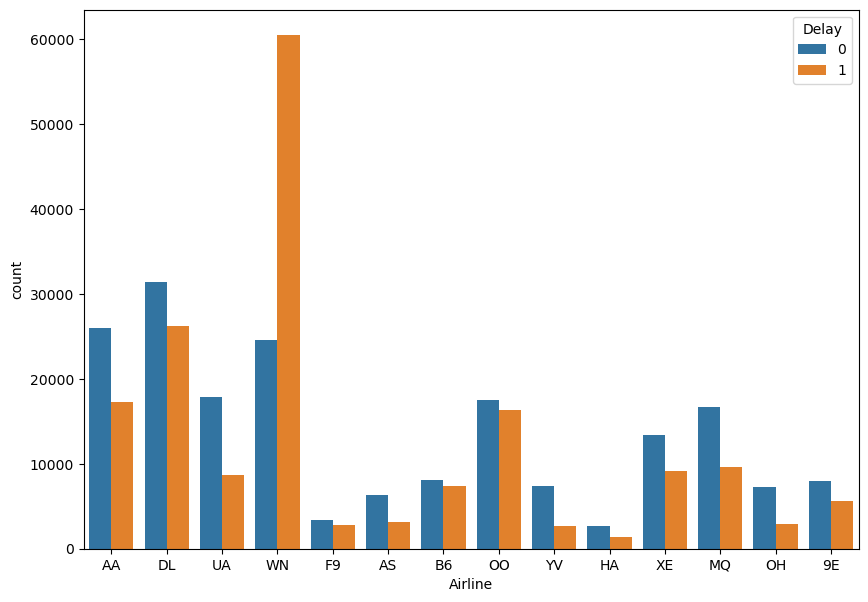

In [52]:
plt.figure(figsize=(10,7))
sns.countplot(final_df['Airline'], hue= final_df['Delay'])
plt.show()

The graph clear show that 70% of flight of south west airline is delayed

### b. Flights were delayed on various weekdays. Which day of the week is the safest for travel?

In [53]:
weekday_df = final_df[['DayOfWeek','Delay']].value_counts().reset_index()

<AxesSubplot:xlabel='DayOfWeek', ylabel='0'>

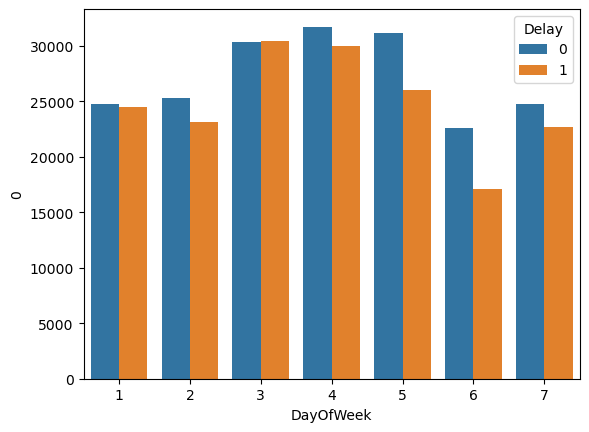

In [54]:
sns.barplot(weekday_df['DayOfWeek'], weekday_df[0], hue= weekday_df['Delay'])

On the 5th day of week its clear that there is less no of flight delay.

### c. Which airlines should be recommended for short-, medium-, and long-distance travel?

We divided the length parameter in three range and from that basis we findout airline acc to the distance

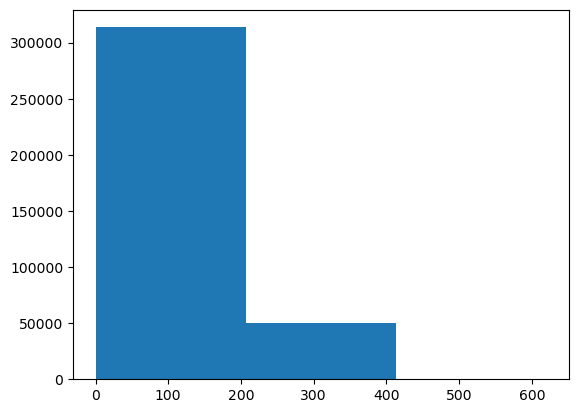

In [55]:
plt.hist(final_df['Length'], bins = 3)
plt.show()

airlines should be recommended for short distance Travel.

In [56]:
final_df['Airline'][final_df['Length']<200].value_counts()

WN    75941
DL    43872
OO    32965
AA    30246
MQ    26076
XE    22114
UA    16388
9E    13573
B6    11628
OH     9963
YV     9884
AS     6350
F9     5406
HA     3034
Name: Airline, dtype: int64

In [57]:
final_df['Airline'][final_df['Length']>400].value_counts()

UA    549
AA    304
DL    226
B6     83
AS     31
HA     14
Name: Airline, dtype: int64

Airlines should be recommended for long distance Travel and remaining for the medium distance.

### d. Do you notice any patterns in the departure times of long-duration flights?

In [58]:
final_df['Time'][final_df['Length']>400]

46345     1045
46348     1045
46356     1045
46364     1045
46367     1045
          ... 
315043    1416
315049    1416
315055    1416
315061    1416
315067    1416
Name: Time, Length: 1207, dtype: int64

It is clear from the above table that is only of that flight which travel a long distance and comman thing in the departure time is all long distance flight leave the airport above 1045 time.

### 4. How many flights were delayed at large hubs compared to medium hubs? Use appropriate visualization to represent your findings.

<AxesSubplot:xlabel='hubs', ylabel='count'>

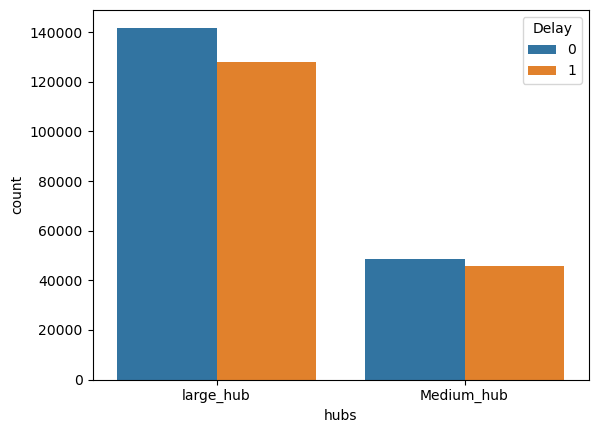

In [59]:
sns.countplot(final_df['hubs'], hue = final_df['Delay'])

From the large hubs its clear approx 120000 filght is delayed but from the small hubs aprrox 40000 is delayed.

### 5. Use hypothesis testing strategies to discover:
### a. If the airport's altitude has anything to do with flight delays for incoming and departing flights

In [60]:
from scipy.stats import chi2_contingency
table = [final_df['latitude_deg'],final_df['Delay']]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=194730.438, p=1.000
Probably independent


So its clear from the above hypothesis testing that altitude is nothing to do with the flight delay

### b. If the number of runways at an airport affects flight delays

In [61]:
from scipy.stats import chi2_contingency
table = [final_df['airport_ref'],final_df['Delay']]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=200241.469, p=1.000
Probably independent


So its clear from the above hypothesis testing that no of runway is nothing to do with the flight delay

### c. If the duration of a flight (length) affects flight delays

In [62]:
from scipy.stats import spearmanr
data1 = final_df['Length']
data2 = final_df['Delay']
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')    

stat=-0.002, p=0.203
Probably independent


Both the variable are independent so that length of the flight is not affecting directly the delay.

### 6. Find the correlation matrix between the flight delay predictors, create a heatmap to visualize this, and share your findings

In [63]:
predictor = final_df.drop(['Delay'], axis=1)
corr = predictor.corr()
corr

,Flight,DayOfWeek,Time,Length,latitude_deg,longitude_deg,elevation_ft,airport_ref,length_ft,width_ft,lighted,closed,Founded
Flight,1.000000,0.003249,0.034959,-0.311840,0.168127,0.061268,0.124437,-0.042421,0.016064,0.010186,0.064012,0.029169,0.389930
DayOfWeek,0.003249,1.000000,0.002218,0.013059,-0.010100,-0.005075,0.000010,0.002675,0.004768,0.003414,-0.004520,-0.004811,-0.005840
Time,0.034959,0.002218,1.000000,-0.045729,-0.024743,-0.002804,0.039522,-0.014048,0.029940,0.038049,-0.001339,-0.006927,0.033776
Length,-0.311840,0.013059,-0.045729,1.000000,0.028905,0.068559,-0.070187,-0.012986,0.083335,0.062138,0.029629,-0.062091,-0.318902
latitude_deg,0.168127,-0.010100,-0.024743,0.028905,1.000000,0.087885,0.208233,-0.095324,0.004430,-0.034404,0.205215,0.087013,0.042304
longitude_deg,0.061268,-0.005075,-0.002804,0.068559,0.087885,1.000000,-0.208175,-0.190519,0.114385,0.024904,0.325019,-0.056677,0.107272
elevation_ft,0.124437,0.000010,0.039522,-0.070187,0.208233,-0.208175,1.000000,0.224565,0.225928,-0.155231,-0.141753,-0.009500,0.009172
airport_ref,-0.042421,0.002675,-0.014048,-0.012986,-0.095324,-0.190519,0.224565,1.000000,0.015333,-0.027424,-0.667705,-0.020312,-0.011249
length_ft,0.016064,0.004768,0.029940,0.083335,0.004430,0.114385,0.225928,0.015333,1.000000,0.211039,0.076685,-0.226149,0.038781
width_ft,0.010186,0.003414,0.038049,0.062138,-0.034404,0.024904,-0.155231,-0.027424,0.211039,1.000000,0.133766,-0.277982,-0.057439


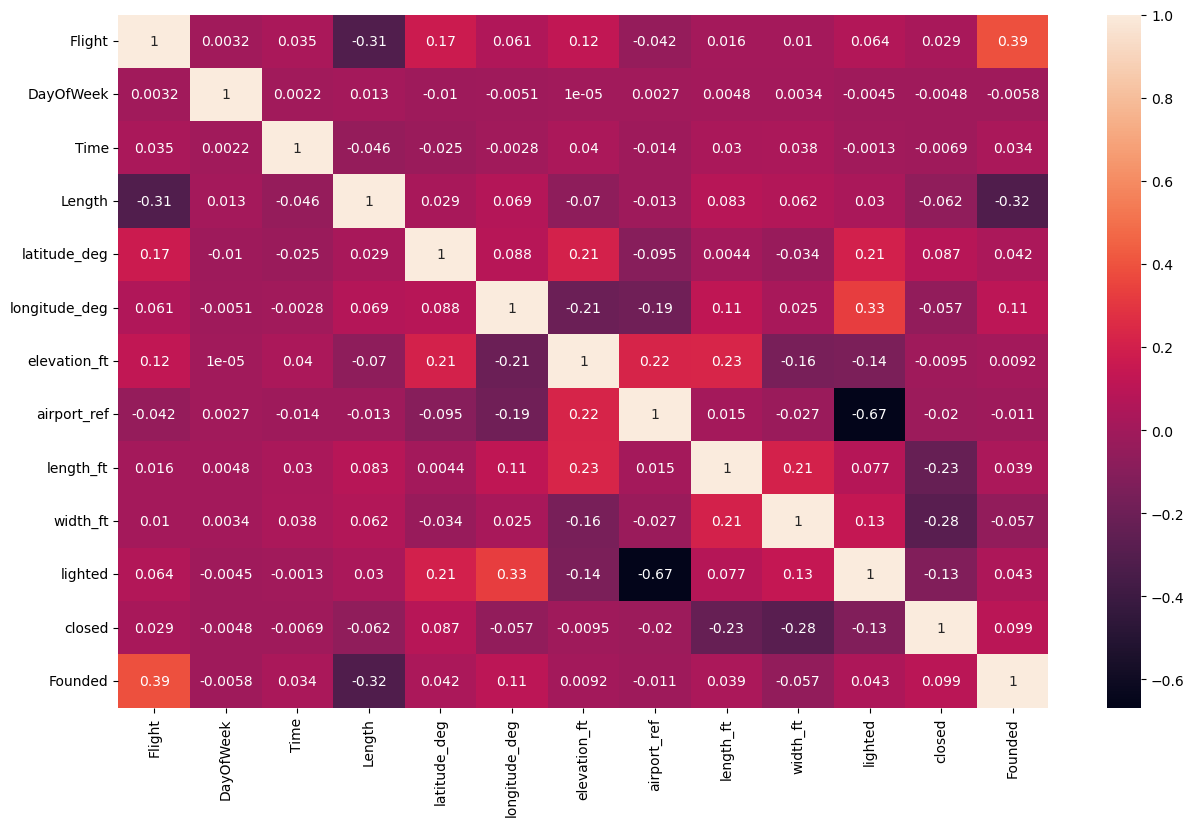

In [64]:
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
sns.pairplot(

## Project Task: Week 1 (Machine learning)

### 1. Use OneHotEncoder and OrdinalEncoder to deal with categorical variables

In [65]:
# Before applying the one hot encodding or the label encoding first we check all feature data type.
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364277 entries, 0 to 364276
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Airline            364277 non-null  object 
 1   Flight             364277 non-null  int64  
 2   DayOfWeek          364277 non-null  int64  
 3   Time               364277 non-null  int64  
 4   Length             364277 non-null  int64  
 5   Delay              364277 non-null  int64  
 6   type               364277 non-null  object 
 7   latitude_deg       364277 non-null  float64
 8   longitude_deg      364277 non-null  float64
 9   elevation_ft       364277 non-null  float64
 10  scheduled_service  364277 non-null  object 
 11  airport_ref        364277 non-null  int64  
 12  length_ft          364277 non-null  float64
 13  width_ft           364277 non-null  float64
 14  lighted            364277 non-null  int64  
 15  closed             364277 non-null  int64  
 16  Fo

In [66]:
final_df['Airline'].value_counts()

WN    85067
DL    57720
AA    43261
OO    33843
UA    26535
MQ    26308
XE    22566
B6    15497
9E    13573
OH    10211
YV    10002
AS     9477
F9     6180
HA     4037
Name: Airline, dtype: int64

In [67]:
final_df['type'].value_counts()

large_airport     342705
medium_airport     21572
Name: type, dtype: int64

In [68]:
final_df['scheduled_service'].value_counts()

yes    364277
Name: scheduled_service, dtype: int64

In [69]:
final_df['hubs'].value_counts()

large_hub     269953
Medium_hub     94324
Name: hubs, dtype: int64

The scheduled_service column throught has same value so it will not help in prediction so lets remove it and other three object column we will change through label encoder.

In [70]:
final_df = final_df.drop(['scheduled_service'], axis=1)

In [71]:
# Now using the ordinal encoder.
from sklearn.preprocessing import LabelEncoder 

In [72]:
le = LabelEncoder()

In [73]:
final_df['Airline'] = le.fit_transform(final_df['Airline'])
final_df['type'] = le.fit_transform(final_df['type'])
final_df['hubs'] = le.fit_transform(final_df['hubs'])

In [74]:
final_df.head()

,Airline,Flight,DayOfWeek,Time,Length,Delay,type,latitude_deg,longitude_deg,elevation_ft,airport_ref,length_ft,width_ft,lighted,closed,Founded,hubs
0,1,2466,3,20,195,1,0,37.618999,-122.375,13.0,3878,7500.0,200.0,1,0,1926.0,1
1,1,526,3,360,215,0,0,37.618999,-122.375,13.0,3878,7500.0,200.0,1,0,1926.0,1
2,1,552,3,360,315,1,0,37.618999,-122.375,13.0,3878,7500.0,200.0,1,0,1926.0,1
3,1,810,3,385,255,0,0,37.618999,-122.375,13.0,3878,7500.0,200.0,1,0,1926.0,1
4,1,24,3,425,325,1,0,37.618999,-122.375,13.0,3878,7500.0,200.0,1,0,1926.0,1


### 2. Perform the following model building steps:
### a. Apply logistic regression (use stochastic gradient descent optimizer) and decision tree models
### b. Use the stratified five-fold method to build and validate the models
Note: Make sure you use standardization effectively, ensuring no data leakage and leverage pipelines to have a cleaner code
### c. Use RandomizedSearchCV for hyperparameter tuning, and use k-fold for crossvalidation
### d. Keep a few data points (10%) for prediction purposes to evaluate how you would make the final prediction, and do not use this data for testing or validation
Note: The final prediction will be based on the voting (majority class by 5 models created using the stratified 5-fold method)
### g. Compare the results of logistic regression and decision tree classifier

In [75]:
# Lets first seperate the predictors and the output Variable.
x = final_df.drop(['Delay'], axis= 1)
y = final_df["Delay"]

In [76]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x = scaler.fit_transform(x)

In [77]:
# First Split the data into the training and testing set before performing the further operation.
from sklearn.model_selection import train_test_split 

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=10)

### LogisticRegression

In [79]:
# lets apply the logistic regression with the randomsearchcv hypermeter tunning.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
params = {"penalty": ["l1","l2"],
         'solver': ['newton-cg', 'liblinear']}

# Cross Validation
folds = 5

rscv = RandomizedSearchCV(estimator = lr,
                         param_distributions = params,
                         scoring = "accuracy",
                         verbose = 1,
                         cv= folds)

rscv.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'penalty': ['l1', 'l2'],
                                        'solver': ['newton-cg', 'liblinear']},
                   scoring='accuracy', verbose=1)

In [82]:
print(rscv.best_params_)
print(rscv.best_score_)

{'solver': 'newton-cg', 'penalty': 'l2'}
0.5929315093558369


In [83]:
lr = LogisticRegression(penalty= 'l2', solver= 'newton-cg')
lr.fit(x_train,y_train).score(x_train,y_train)

0.5929193012636915

In [84]:
lr.score(x_test, y_test)

0.5937191171626222

### DecisionTreeClassifier

In [85]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

params = {'criterion': ["gini", "entropy"],
          'min_samples_leaf' : [2,3,4,5,6,7,8,9],
         "max_depth": [2,3,4,5,6,7,8,9]}

rscv = RandomizedSearchCV(estimator = dt,
                             param_distributions= params,
                             scoring = "accuracy",
                             cv= 5,
                             verbose=1)
rscv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9]},
                   scoring='accuracy', verbose=1)

In [86]:
print(rscv.best_params_)
print(rscv.best_score_)

{'min_samples_leaf': 9, 'max_depth': 7, 'criterion': 'entropy'}
0.6430124896771539


In [87]:
dtc = DecisionTreeClassifier(max_depth= 9, criterion= 'entropy',min_samples_leaf= 6)

In [88]:
dtc.fit(x_train, y_train).score(x_train, y_train)

0.653956547068925

In [89]:
dtc.score(x_test, y_test)

0.6493356758537389

After seeing the result its clear decision tree has good accuracy.

### 3. Use the stratified five-fold method to build and validate the models using the XGB classifier, compare all methods, and share your findings


In [90]:
from xgboost import XGBClassifier


# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
                 'n_estimators': range(8, 20),
                 'max_depth': range(6, 10),
                 'learning_rate': [.4, .45, .5, .55, .6],
                 'colsample_bytree': [.6, .7, .8, .9, 1]
                  }

# Instantiate the regressor: gbm
gbm = XGBClassifier()

# Perform random search: grid_mse
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                    estimator = gbm, scoring = "accuracy", 
                                    verbose = 1, n_iter = 50, cv = 3)

# Fit randomized_mse to the data
xgb_random.fit(x_train, y_train)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_random.best_params_)
print("Best accuracy found: ", xgb_random.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'n_estimators': 19, 'max_depth': 9, 'learning_rate': 0.4, 'colsample_bytree': 1}
Best accuracy found:  0.6621798449896141


In [91]:
xgb = XGBClassifier(n_estimators=14, max_depth=9, learning_rate=0.45, colsample_bytree=0.9)
xgb.fit(x_train,y_train).score(x_train,y_train)

0.6860200885163596

In [92]:
# Now lets compare the all method.
print(lr.score(x_test, y_test))
print(dtc.score(x_test, y_test))
print(xgb.score(x_test, y_test))

0.5937191171626222
0.6493356758537389
0.6633358954650269


After comparing the accuracy of the diffrent model the best result we getting from the XGBclassifier.